In [1]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

import seaborn as sns
import numpy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import pandas as pd
%matplotlib notebook
# import

In [ ]:
raw_data_folder = "raw_data//"
processed_data_folder = "processed_data//"
models_folder = "models//"

For PCA to work, we will need to fully process the dataset, then standardize it to have mean 0 and standard deviation 1.
<br>
Then, we can visualize the difference between the two encodings and try to observe if one gives far better separation than the other

In [12]:
data_ordinal = pd.read_csv(processed_data_folder + "standardized_train_ordinal.csv")
data_onehot = pd.read_csv(processed_data_folder + "standardized_train_onehot.csv")

target = data_ordinal.Survived

data_ordinal.drop("Survived",axis = 1, inplace = True)
data_onehot.drop("Survived",axis = 1, inplace = True)

<IPython.core.display.Javascript object>


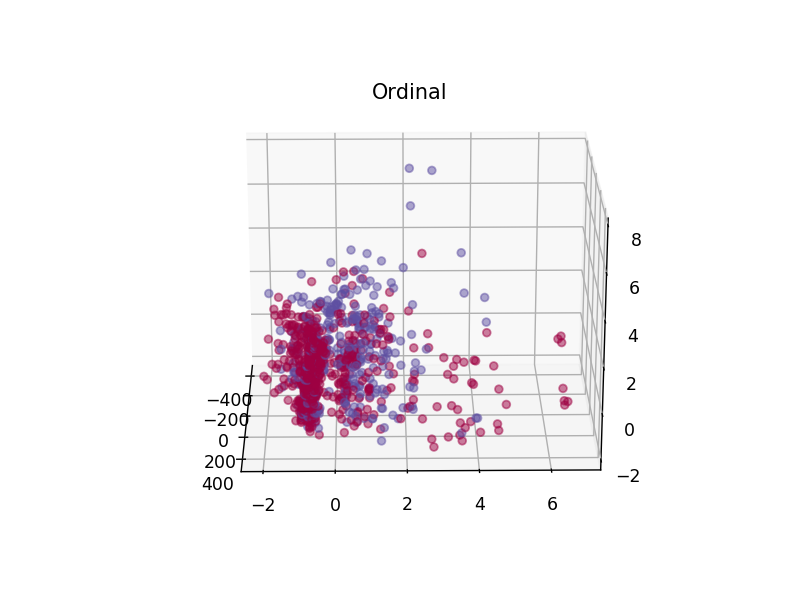

(891, 3)


In [13]:
pca = PCA(n_components = 3)
projected = pca.fit_transform(data_ordinal)

ax = plt.axes(projection = '3d')
print(projected.shape)
ax.set_title("Ordinal")
ax.scatter3D(projected[:, 0], projected[:, 1],projected[:,2],
            c=target, alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))

In [4]:
# principal_components = pca.fit(data).components_

In [5]:
# pd.DataFrame(principal_components,columns = data.columns)

<IPython.core.display.Javascript object>


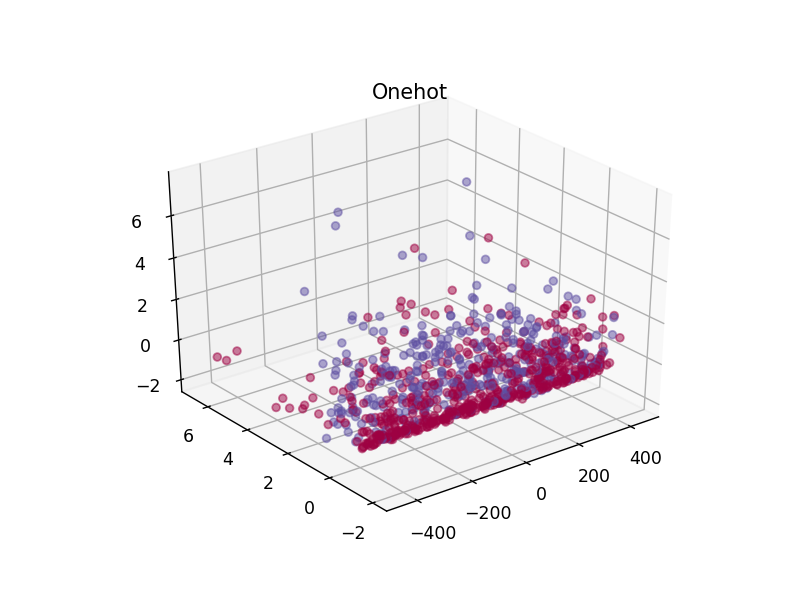

(891, 3)


In [9]:
pca = PCA(n_components = 3)
projected = pca.fit_transform(data_onehot)

ax = plt.axes(projection = '3d')
print(projected.shape)
ax.set_title("Onehot")
ax.scatter3D(projected[:, 0], projected[:, 1],projected[:,2],
            c=target, alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))

As we can see, onehot encoding seems to separate the data better. However, the difference is not big enough to completely exclude the ordinal encoding due to the variation the latter may bring when in its original 11-dimensional space.
We can conclude both are worth trying out.

In [7]:
data_ordinal.mean()

Unnamed: 0    4.450000e+02
Pclass        2.308642e+00
Sex           6.475870e-01
Age           2.429158e-16
SibSp         5.230079e-01
Parch         3.815937e-01
Fare          3.208557e-17
Embarked      1.536476e+00
Alone         3.973064e-01
dtype: float64